In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import RidgeClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import AdaBoostClassifier

from imblearn.under_sampling import RandomUnderSampler,EditedNearestNeighbours

In [2]:
vinos = pd.read_csv('winequalityN.csv')
vinos.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
vinos.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
vinos = vinos.dropna()
vinos.replace({'red':0,'white':1}, inplace=True)
vinos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   int64  
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 706.9 KB


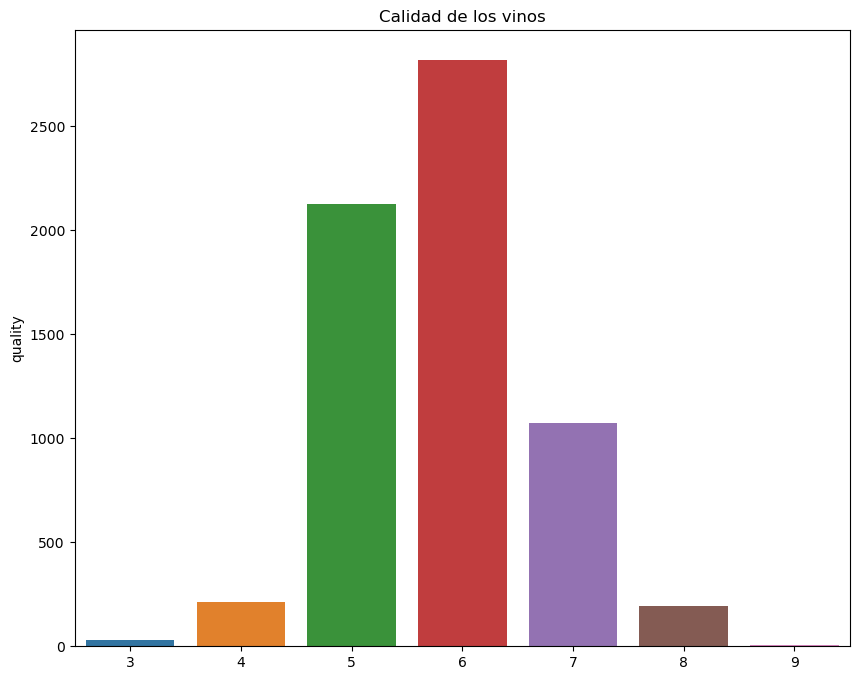

In [6]:
plt.figure(figsize = (10,8))
sns.barplot(x = vinos['quality'].value_counts().index,
            y = vinos['quality'].value_counts()).set(title = "Calidad de los vinos");

plt.show()

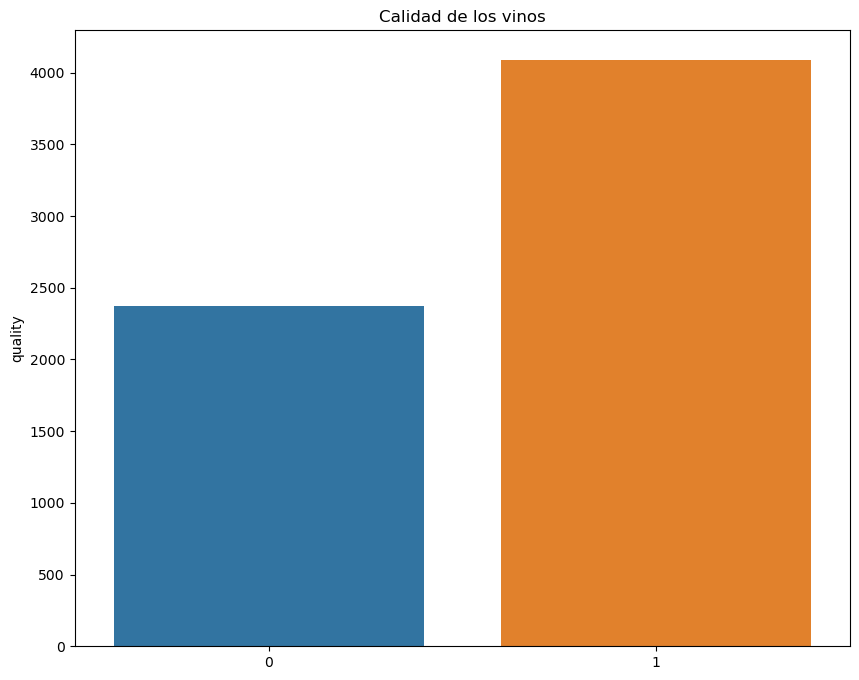

In [7]:
vinos['quality']=[1 if x>5 else 0 for x in vinos.quality]
plt.figure(figsize = (10,8))
sns.barplot(x = vinos['quality'].value_counts().index,
            y = vinos['quality'].value_counts()).set(title = "Calidad de los vinos");

plt.show()

In [8]:
x = vinos.drop('quality',1).values
y = vinos['quality'].values

scaler = StandardScaler()
x = scaler.fit_transform(x)

rus = EditedNearestNeighbours()
X_res, Y_res = rus.fit_resample(x, y)
rus = RandomUnderSampler()
x_res, y_res = rus.fit_resample(X_res, Y_res)

C:\Users\nitus\AppData\Local\Temp\ipykernel_8952\3465895310.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = vinos.drop('quality',1).values


In [9]:
modelos = [('KNN',KNeighborsClassifier(n_neighbors=2)),
           ('RN',RadiusNeighborsClassifier(radius=80.0, weights='distance')),
           ('Decision Tree',DecisionTreeClassifier()),
           ('Extra Tree',ExtraTreeClassifier()),
           ('Ridge',RidgeClassifier(tol=1e-5))]

'''        ('KNN',KNeighborsClassifier(n_neighbors=1)),
           ('RN',RadiusNeighborsClassifier(radius=80.0, weights='distance')),
           ('Decision Tree',DecisionTreeClassifier()),
           ('Extra Tree',ExtraTreeClassifier()),
           ('Ridge',RidgeClassifier(tol=1e-5))
           ('SVM',SVC(C=19870)),
           ('GPC',GaussianProcessClassifier(n_restarts_optimizer=3)),
           ('Ada Boost', AdaBoostClassifier(n_estimators=10000, learning_rate=0.2),
           ('Logistic Regression', LogisticRegression(C=100, max_iter=10000)),
           '''


resultado_accuracy = []
resultado_error = []
resultado_precision = []
resultado_sensitivity = []
resultado_specifity = []

In [10]:
#Hold-Out (60/40)
X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res, test_size=0.40)

for nombre,modelo in modelos:
    modelo.fit(X_train,Y_train)
    y_pred = modelo.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(Y_test,y_pred).ravel()
    if nombre == 'KNN':
        print("Matriz de confusion Total Recognition (%)")
        print("TP: "+str(tp)+"  FN: "+str(fn)+"    |"+str(tp+fn)+"  |"+str((tp*100)/(tp+fn)))
        print("FP: "+str(fp)+"  TN: "+str(tn)+"    |"+str(fp+tn)+"  |"+str((tn*100)/(tn+fp)))
        print("T:  "+str(tp+fp)+"     "+str(fn+tn)+"    |"+str(tp+fn+fp+tn)+" |"+str((tp+tn)*100/(tp+fn+fp+tn)))
    #EXACTITUD
    exactitud = (tp+tn)/(tp+fp+tn+fn)
    resultado_accuracy.append((nombre,exactitud))
    #TASA DE ERROR
    error = (fp+fn)/(tp+fp+tn+fn)
    resultado_error.append((nombre,error))
    #PRECISION
    precision = tp/(tp+fp)
    resultado_precision.append((nombre,precision))
    #SENSIVILIDAD
    sensitivity = tp/(tp+fn)
    resultado_sensitivity.append((nombre,sensitivity))
    #ESPECIFIDAD
    specifity = tn/(fp+tn)
    resultado_specifity.append((nombre,specifity))

resultado_accuracy.sort(key=lambda k:k[1], reverse=True)
resultado_error.sort(key=lambda k:k[1], reverse=True)
resultado_precision.sort(key=lambda k:k[1], reverse=True)
resultado_sensitivity.sort(key=lambda k:k[1], reverse=True)
resultado_specifity.sort(key=lambda k:k[1], reverse=True)
print("\nExactitud\n")
resultado_accuracy

Matriz de confusion Total Recognition (%)
TP: 804  FN: 158    |962  |83.57588357588358
FP: 71  TN: 865    |936  |92.41452991452991
T:  875     1023    |1898 |87.93466807165437

Exactitud



[('KNN', 0.8793466807165438),
 ('RN', 0.839831401475237),
 ('Decision Tree', 0.8356164383561644),
 ('Extra Tree', 0.8071654373024236),
 ('Ridge', 0.8008429926238145)]

In [11]:
print("Tasa de error")
resultado_error

Tasa de error


[('Ridge', 0.19915700737618547),
 ('Extra Tree', 0.1928345626975764),
 ('Decision Tree', 0.1643835616438356),
 ('RN', 0.1601685985247629),
 ('KNN', 0.12065331928345627)]

In [12]:
print("Precision")
resultado_precision

Precision


[('KNN', 0.9188571428571428),
 ('Decision Tree', 0.8302845528455285),
 ('Extra Tree', 0.8163481953290871),
 ('RN', 0.8145315487571702),
 ('Ridge', 0.8016528925619835)]

In [13]:
print("Sensivilidad")
resultado_sensitivity

Sensivilidad


[('RN', 0.8856548856548857),
 ('Decision Tree', 0.8492723492723493),
 ('KNN', 0.8357588357588358),
 ('Ridge', 0.8066528066528067),
 ('Extra Tree', 0.7993762993762994)]

In [14]:
print("Especifidad")
resultado_specifity

Especifidad


[('KNN', 0.9241452991452992),
 ('Decision Tree', 0.8215811965811965),
 ('Extra Tree', 0.8151709401709402),
 ('Ridge', 0.7948717948717948),
 ('RN', 0.7927350427350427)]

In [15]:
resultado_accuracy.clear()
resultado_error.clear()
resultado_precision.clear()
resultado_sensitivity.clear()
resultado_specifity.clear()

In [16]:
#Hold-Out (100/100)
for nombre,modelo in modelos:
    modelo.fit(x_res,y_res)
    y_pred = modelo.predict(x_res)
    tn, fp, fn, tp = confusion_matrix(y_res,y_pred).ravel()
    if nombre == 'KNN':
        print("Matriz de confusion Total Recognition (%)")
        print("TP: "+str(tp)+"  FN: "+str(fn)+"    |"+str(tp+fn)+"  |"+str((tp*100)/(tp+fn)))
        print("FP: "+str(fp)+"  TN: "+str(tn)+"    |"+str(fp+tn)+"  |"+str((tn*100)/(tn+fp)))
        print("T:  "+str(tp+fp)+"     "+str(fn+tn)+"    |"+str(tp+fn+fp+tn)+" |"+str((tp+tn)*100/(tp+fn+fp+tn)))
    #EXACTITUD
    exactitud = (tp+tn)/(tp+fp+tn+fn)
    resultado_accuracy.append((nombre,exactitud))
    #TASA DE ERROR
    error = (fp+fn)/(tp+fp+tn+fn)
    resultado_error.append((nombre,error))
    #PRECISION
    precision = tp/(tp+fp)
    resultado_precision.append((nombre,precision))
    #SENSIVILIDAD
    sensitivity = tp/(tp+fn)
    resultado_sensitivity.append((nombre,sensitivity))
    #ESPECIFIDAD
    specifity = tn/(fp+tn)
    resultado_specifity.append((nombre,specifity))

resultado_accuracy.sort(key=lambda k:k[1], reverse=True)
resultado_error.sort(key=lambda k:k[1], reverse=True)
resultado_precision.sort(key=lambda k:k[1], reverse=True)
resultado_sensitivity.sort(key=lambda k:k[1], reverse=True)
resultado_specifity.sort(key=lambda k:k[1], reverse=True)
print("\nExactitud\n")
resultado_accuracy

Matriz de confusion Total Recognition (%)
TP: 2331  FN: 41    |2372  |98.27150084317032
FP: 0  TN: 2372    |2372  |100.0
T:  2331     2413    |4744 |99.13575042158516

Exactitud



[('RN', 1.0),
 ('Decision Tree', 1.0),
 ('Extra Tree', 1.0),
 ('KNN', 0.9913575042158516),
 ('Ridge', 0.7974283305227656)]

In [17]:
print("Tasa de error")
resultado_error

Tasa de error


[('Ridge', 0.2025716694772344),
 ('KNN', 0.008642495784148397),
 ('RN', 0.0),
 ('Decision Tree', 0.0),
 ('Extra Tree', 0.0)]

In [18]:
print("Precision")
resultado_precision

Precision


[('KNN', 1.0),
 ('RN', 1.0),
 ('Decision Tree', 1.0),
 ('Extra Tree', 1.0),
 ('Ridge', 0.7975537747785745)]

In [19]:
print("Sensivilidad")
resultado_sensitivity

Sensivilidad


[('RN', 1.0),
 ('Decision Tree', 1.0),
 ('Extra Tree', 1.0),
 ('KNN', 0.9827150084317032),
 ('Ridge', 0.7972175379426644)]

In [20]:
print("Especifidad")
resultado_specifity

Especifidad


[('KNN', 1.0),
 ('RN', 1.0),
 ('Decision Tree', 1.0),
 ('Extra Tree', 1.0),
 ('Ridge', 0.7976391231028668)]

In [21]:
resultado_accuracy.clear()
resultado_error.clear()
resultado_precision.clear()
resultado_sensitivity.clear()
resultado_specifity.clear()

In [22]:
#Random subsampling (N=30)
exactitud = [0,0,0,0,0]
error = [0,0,0,0,0]
precision = [0,0,0,0,0]
sensitivity = [0,0,0,0,0]
specifity = [0,0,0,0,0]

tn2=0
fp2=0
fn2=0
tp2=0

for i in range(30):
    j=0
    X_train, X_test, Y_train, Y_test = train_test_split(x_res, y_res)

    for nombre,modelo in modelos:
        modelo.fit(X_train,Y_train)
        y_pred = modelo.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(Y_test,y_pred).ravel()
        if nombre == 'KNN':
            tn2 += tn
            fp2 += fp
            fn2 += fn
            tp2 += tp
        #EXACTITUD
        if (tp+fp+tn+fn) != 0:
            exactitud[j] += (tp+tn)/(tp+fp+tn+fn)
        #TASA DE ERROR
            error[j] += (fp+fn)/(tp+fp+tn+fn)
        #PRECISION
        if (tp+fp) != 0:
            precision[j] += tp/(tp+fp)
        #SENSIVILIDAD
        if (tp+fn) != 0:
            sensitivity[j] += tp/(tp+fn)
        #ESPECIFIDAD
        if (tn+fp) != 0:
            specifity[j] += tn/(fp+tn)
        j += 1

tn2 /= 30
fp2 /= 30
fn2 /= 30
tp2 /= 30

print("Matriz de confusion    Total   Recognition (%)")
print("TP: "+str(tp2)+"  FN: "+str(fn2)+"    |"+str(tp2+fn2)+"  |"+str(0 if (tp2+fn2) == 0 else round((tp2*100)/(tp2+fn2),3)))
print("FP: "+str(fp2)+"  TN: "+str(tn2)+"    |"+str(fp2+tn2)+"  |"+str(0 if (tp2+fn2) == 0 else round((tn2*100)/(tn2+fp2),3)))
print("T:  "+str(tp2+fp2)+"     "+str(fn2+tn2)+"    |"+str(tp2+fn2+fp2+tn2)+" |"+str(0 if (tp2+fn2+fp2+tn2) == 0 else round((tp2+tn2)*100/(tp2+fn2+fp2+tn2),3)))

i = 0
for nombre,modelo in modelos:
    #EXACTITUD
    resultado_accuracy.append((nombre,exactitud[i]/30))
    #TASA DE ERROR
    resultado_error.append((nombre,error[i]/30))
    #PRECISION
    resultado_precision.append((nombre,precision[i]/30))
    #SENSIVILIDAD
    resultado_sensitivity.append((nombre,sensitivity[i]/30))
    #ESPECIFIDAD
    resultado_specifity.append((nombre,specifity[i]/30))
    i += 1

resultado_accuracy.sort(key=lambda k:k[1], reverse=True)
resultado_error.sort(key=lambda k:k[1], reverse=True)
resultado_precision.sort(key=lambda k:k[1], reverse=True)
resultado_sensitivity.sort(key=lambda k:k[1], reverse=True)
resultado_specifity.sort(key=lambda k:k[1], reverse=True)
print("\nExactitud\n")
resultado_accuracy

Matriz de confusion    Total   Recognition (%)
TP: 538.0  FN: 57.43333333333333    |595.4333333333333  |90.354
FP: 48.7  TN: 541.8666666666667    |590.5666666666667  |91.754
T:  586.7     599.3    |1186.0 |91.051

Exactitud



[('KNN', 0.9105115233277122),
 ('Decision Tree', 0.8489038785834739),
 ('RN', 0.8363687464867904),
 ('Extra Tree', 0.8326306913996628),
 ('Ridge', 0.79283305227656)]

In [23]:
print("Tasa de error")
resultado_error

Tasa de error


[('Ridge', 0.20716694772344016),
 ('Extra Tree', 0.16736930860033727),
 ('RN', 0.16363125351320965),
 ('Decision Tree', 0.15109612141652615),
 ('KNN', 0.08948847667228778)]

In [24]:
print("Precision")
resultado_precision

Precision


[('KNN', 0.9170205884835505),
 ('Decision Tree', 0.8451505423624454),
 ('Extra Tree', 0.8292879571420619),
 ('RN', 0.7956498038565173),
 ('Ridge', 0.7955768263963988)]

In [25]:
print("Sensivilidad")
resultado_sensitivity

Sensivilidad


[('RN', 0.9086023536747169),
 ('KNN', 0.9035122597450851),
 ('Decision Tree', 0.8558765042129752),
 ('Extra Tree', 0.8396181254388816),
 ('Ridge', 0.7907943741170783)]

In [26]:
print("Especifidad")
resultado_specifity

Especifidad


[('KNN', 0.9175414776516736),
 ('Decision Tree', 0.8419443845705445),
 ('Extra Tree', 0.8257689605883735),
 ('Ridge', 0.795092335081688),
 ('RN', 0.7644359687773552)]

In [27]:
resultado_accuracy.clear()
resultado_error.clear()
resultado_precision.clear()
resultado_sensitivity.clear()
resultado_specifity.clear()
exactitud.clear()
error.clear()
precision.clear()
sensitivity.clear()
specifity.clear()

In [28]:
#K-fold (K=10)
exactitud = [0,0,0,0,0]
error = [0,0,0,0,0]
precision = [0,0,0,0,0]
sensitivity = [0,0,0,0,0]
specifity = [0,0,0,0,0]

tn2=[0,0,0,0,0]
fp2=[0,0,0,0,0]
fn2=[0,0,0,0,0]
tp2=[0,0,0,0,0]

kf = KFold(n_splits=10)

for train,test in kf.split(x_res):
    j=0
    X_train, X_test, Y_train, Y_test = x_res[train], x_res[test], y_res[train], y_res[test]

    for nombre,modelo in modelos:
        modelo.fit(X_train,Y_train)
        y_pred = modelo.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(Y_test,y_pred, labels=[0,1]).ravel()
        
        tn2[j] += tn
        fp2[j] += fp
        fn2[j] += fn
        tp2[j] += tp
        
        j += 1
        
i = 0
for nombre,modelo in modelos:
    #EXACTITUD
    resultado_accuracy.append((nombre,(tp2[i]+tn2[i])/(tp2[i]+fp2[i]+tn2[i]+fn2[i])))
    #TASA DE ERROR
    resultado_error.append((nombre,(fp2[i]+fn2[i])/(tp2[i]+fp2[i]+tn2[i]+fn2[i])))
    #PRECISION
    resultado_precision.append((nombre,tp2[i]/(tp2[i]+fp2[i])))
    #SENSIVILIDAD
    resultado_sensitivity.append((nombre,tp2[i]/(tp2[i]+fn2[i])))
    #ESPECIFIDAD
    resultado_specifity.append((nombre,tn2[i]/(fp2[i]+tn2[i])))
    i += 1
    
tn2[0] /= 10
fp2[0] /= 10
fn2[0] /= 10
tp2[0] /= 10

print("Matriz de confusion  Total   Recognition (%)")
print("TP: "+str(tp2[0])+"  FN: "+str(fn2[0])+"    |"+str(round((tp2[0]+fn2[0]),3))+"  |"+str(0 if (tp2[0]+fn2[0]) == 0 else round((tp2[0]*100)/(tp2[0]+fn2[0]),3)))
print("FP: "+str(fp2[0])+"  TN: "+str(tn2[0])+"    |"+str(round((fp2[0]+tn2[0]),3))+"  |"+str(0 if (tp2[0]+fn2[0]) == 0 else round((tn2[0]*100)/(tn2[0]+fp2[0]),3)))
print("T:  "+str(tp2[0]+fp2[0])+"     "+str(fn2[0]+tn2[0])+"    |"+str(round((tp2[0]+fn2[0]+fp2[0]+tn2[0]),3))+" |"+str(0 if (tp2[0]+fn2[0]+fp2[0]+tn2[0]) == 0 else round((tp2[0]+tn2[0])*100/(tp2[0]+fn2[0]+fp2[0]+tn2[0]),3)))

resultado_accuracy.sort(key=lambda k:k[1], reverse=True)
resultado_error.sort(key=lambda k:k[1], reverse=True)
resultado_precision.sort(key=lambda k:k[1], reverse=True)
resultado_sensitivity.sort(key=lambda k:k[1], reverse=True)
resultado_specifity.sort(key=lambda k:k[1], reverse=True)
print("\nExactitud\n")
resultado_accuracy

Matriz de confusion  Total   Recognition (%)
TP: 213.5  FN: 23.7    |237.2  |90.008
FP: 49.4  TN: 187.8    |237.2  |79.174
T:  262.9     211.5    |474.4 |84.591

Exactitud



[('KNN', 0.8459106239460371),
 ('Decision Tree', 0.7670741989881956),
 ('Extra Tree', 0.7514755480607083),
 ('Ridge', 0.7339797639123102),
 ('RN', 0.3104974704890388)]

In [29]:
print("Tasa de error")
resultado_error

Tasa de error


[('RN', 0.6895025295109612),
 ('Ridge', 0.2660202360876897),
 ('Extra Tree', 0.24852445193929174),
 ('Decision Tree', 0.23292580101180438),
 ('KNN', 0.1540893760539629)]

In [30]:
print("Precision")
resultado_precision

Precision


[('KNN', 0.8120958539368581),
 ('Decision Tree', 0.726654740608229),
 ('Ridge', 0.7252435064935064),
 ('Extra Tree', 0.7180987202925045),
 ('RN', 0.38266771078047507)]

In [31]:
print("Sensivilidad")
resultado_sensitivity

Sensivilidad


[('KNN', 0.9000843170320405),
 ('Decision Tree', 0.856239460370995),
 ('Extra Tree', 0.8279932546374368),
 ('Ridge', 0.7533726812816189),
 ('RN', 0.6180438448566611)]

In [32]:
print("Especifidad")
resultado_specifity

Especifidad


[('KNN', 0.7917369308600337),
 ('Ridge', 0.7145868465430016),
 ('Decision Tree', 0.6779089376053963),
 ('Extra Tree', 0.6749578414839797),
 ('RN', 0.002951096121416526)]

In [33]:
resultado_accuracy.clear()
resultado_error.clear()
resultado_precision.clear()
resultado_sensitivity.clear()
resultado_specifity.clear()

In [34]:
#Leave One Out
exactitud = [0,0,0,0,0]
error = [0,0,0,0,0]
precision = [0,0,0,0,0]
sensitivity = [0,0,0,0,0]
specifity = [0,0,0,0,0]

tn2=[0,0,0,0,0]
fp2=[0,0,0,0,0]
fn2=[0,0,0,0,0]
tp2=[0,0,0,0,0]

loo = LeaveOneOut()

for train,test in loo.split(x_res):
    j=0
    X_train, X_test, Y_train, Y_test = x_res[train], x_res[test], y_res[train], y_res[test]

    for nombre,modelo in modelos:
        modelo.fit(X_train,Y_train)
        y_pred = modelo.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(Y_test,y_pred, labels=[0,1]).ravel()
        
        tn2[j] += tn
        fp2[j] += fp
        fn2[j] += fn
        tp2[j] += tp
        
        j += 1
        
i = 0
for nombre,modelo in modelos:
    #EXACTITUD
    resultado_accuracy.append((nombre,(tp2[i]+tn2[i])/(tp2[i]+fp2[i]+tn2[i]+fn2[i])))
    #TASA DE ERROR
    resultado_error.append((nombre,(fp2[i]+fn2[i])/(tp2[i]+fp2[i]+tn2[i]+fn2[i])))
    #PRECISION
    resultado_precision.append((nombre,tp2[i]/(tp2[i]+fp2[i])))
    #SENSIVILIDAD
    resultado_sensitivity.append((nombre,tp2[i]/(tp2[i]+fn2[i])))
    #ESPECIFIDAD
    resultado_specifity.append((nombre,tn2[i]/(fp2[i]+tn2[i])))
    i += 1

tn2[0] /= len(x_res)
fp2[0] /= len(x_res)
fn2[0] /= len(x_res)
tp2[0] /= len(x_res)
    
print("Matriz de confusion  Total   Recognition (%)")
print("TP: "+str(round(tp2[0],3))+"  FN: "+str(round(fn2[0],3))+"    |"+str(round((tp2[0]+fn2[0]),3))+"  |"+str(0 if (tp2[0]+fn2[0]) == 0 else round((tp2[0]*100)/(tp2[0]+fn2[0]),3)))
print("FP: "+str(round(fp2[0],3))+"  TN: "+str(round(tn2[0],3))+"    |"+str(round((fp2[0]+tn2[0]),3))+"  |"+str(0 if (tp2[0]+fn2[0]) == 0 else round((tn2[0]*100)/(tn2[0]+fp2[0]),3)))
print("T:  "+str(round((tp2[0]+fp2[0]),3))+"     "+str(round((fn2[0]+tn2[0]),3))+"    |"+str(round((tp2[0]+fn2[0]+fp2[0]+tn2[0]),3))+" |"+str(0 if (tp2[0]+fn2[0]+fp2[0]+tn2[0]) == 0 else round((tp2[0]+tn2[0])*100/(tp2[0]+fn2[0]+fp2[0]+tn2[0]),3)))

resultado_accuracy.sort(key=lambda k:k[1], reverse=True)
resultado_error.sort(key=lambda k:k[1], reverse=True)
resultado_precision.sort(key=lambda k:k[1], reverse=True)
resultado_sensitivity.sort(key=lambda k:k[1], reverse=True)
resultado_specifity.sort(key=lambda k:k[1], reverse=True)
print("\nExactitud\n")
resultado_accuracy

Matriz de confusion  Total   Recognition (%)
TP: 0.469  FN: 0.031    |0.5  |93.718
FP: 0.037  TN: 0.463    |0.5  |92.58
T:  0.506     0.494    |1.0 |93.149

Exactitud



[('KNN', 0.9314924114671164),
 ('Decision Tree', 0.8699409780775716),
 ('Extra Tree', 0.8556070826306914),
 ('RN', 0.8507588532883642),
 ('Ridge', 0.7970067453625632)]

In [35]:
print("Tasa de error")
resultado_error

Tasa de error


[('Ridge', 0.20299325463743675),
 ('RN', 0.14924114671163574),
 ('Extra Tree', 0.1443929173693086),
 ('Decision Tree', 0.13005902192242833),
 ('KNN', 0.06850758853288365)]

In [36]:
print("Precision")
resultado_precision

Precision


[('KNN', 0.9266360983743226),
 ('Decision Tree', 0.8666945256999582),
 ('Extra Tree', 0.8484097480380008),
 ('RN', 0.8054331864904553),
 ('Ridge', 0.7968815844922039)]

In [37]:
print("Sensivilidad")
resultado_sensitivity

Sensivilidad


[('KNN', 0.9371838111298483),
 ('RN', 0.9249578414839797),
 ('Decision Tree', 0.8743676222596964),
 ('Extra Tree', 0.8659359190556493),
 ('Ridge', 0.7972175379426644)]

In [38]:
print("Especifidad")
resultado_specifity

Especifidad


[('KNN', 0.9258010118043845),
 ('Decision Tree', 0.8655143338954469),
 ('Extra Tree', 0.8452782462057336),
 ('Ridge', 0.7967959527824621),
 ('RN', 0.7765598650927488)]

In [39]:
resultado_accuracy.clear()
resultado_error.clear()
resultado_precision.clear()
resultado_sensitivity.clear()
resultado_specifity.clear()

In [40]:
#Stratified cross-validation (K=10)
exactitud = [0,0,0,0,0]
error = [0,0,0,0,0]
precision = [0,0,0,0,0]
sensitivity = [0,0,0,0,0]
specifity = [0,0,0,0,0]

tn2=0
fp2=0
fn2=0
tp2=0

skf = StratifiedKFold(n_splits=10)

for train,test in skf.split(x_res,y_res):
    j=0
    X_train, X_test, Y_train, Y_test = x_res[train], x_res[test], y_res[train], y_res[test]

    for nombre,modelo in modelos:
        modelo.fit(X_train,Y_train)
        y_pred = modelo.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(Y_test,y_pred, labels=[0,1]).ravel()
        if nombre == 'KNN':
            tn2 += tn
            fp2 += fp
            fn2 += fn
            tp2 += tp
        #EXACTITUD
        if (tp+fp+tn+fn) != 0:
            exactitud[j] += (tp+tn)/(tp+fp+tn+fn)
        #TASA DE ERROR
            error[j] += (fp+fn)/(tp+fp+tn+fn)
        #PRECISION
        if (tp+fp) != 0:
            precision[j] += tp/(tp+fp)
        #SENSIVILIDAD
        if (tp+fn) != 0:
            sensitivity[j] += tp/(tp+fn)
        #ESPECIFIDAD
        if (tn+fp) != 0:
            specifity[j] += tn/(fp+tn)
        j += 1

tn2 /= 10
fp2 /= 10
fn2 /= 10
tp2 /= 10

print("Matriz de confusion    Total   Recognition (%)")
print("TP: "+str(tp2)+"  FN: "+str(fn2)+"    |"+str(round((tp2+fn2),3))+"  |"+str(0 if (tp2+fn2) == 0 else round((tp2*100)/(tp2+fn2),3)))
print("FP: "+str(fp2)+"  TN: "+str(tn2)+"    |"+str(round((fp2+tn2),3))+"  |"+str(0 if (tp2+fn2) == 0 else round((tn2*100)/(tn2+fp2),3)))
print("T:  "+str(tp2+fp2)+"     "+str(round((fn2+tn2),3))+"    |"+str(round((tp2+fn2+fp2+tn2),3))+" |"+str(0 if (tp2+fn2+fp2+tn2) == 0 else round((tp2+tn2)*100/(tp2+fn2+fp2+tn2),3)))

i = 0
for nombre,modelo in modelos:
    #EXACTITUD
    resultado_accuracy.append((nombre,exactitud[i]/10))
    #TASA DE ERROR
    resultado_error.append((nombre,error[i]/10))
    #PRECISION
    resultado_precision.append((nombre,precision[i]/10))
    #SENSIVILIDAD
    resultado_sensitivity.append((nombre,sensitivity[i]/10))
    #ESPECIFIDAD
    resultado_specifity.append((nombre,specifity[i]/10))
    i += 1

resultado_accuracy.sort(key=lambda k:k[1], reverse=True)
resultado_error.sort(key=lambda k:k[1], reverse=True)
resultado_precision.sort(key=lambda k:k[1], reverse=True)
resultado_sensitivity.sort(key=lambda k:k[1], reverse=True)
resultado_specifity.sort(key=lambda k:k[1], reverse=True)
print("\nExactitud\n")
resultado_accuracy

Matriz de confusion    Total   Recognition (%)
TP: 219.8  FN: 17.4    |237.2  |92.664
FP: 37.9  TN: 199.3    |237.2  |84.022
T:  257.7     216.7    |474.4 |88.343

Exactitud



[('KNN', 0.8834159449256053),
 ('Decision Tree', 0.8066897623806352),
 ('Extra Tree', 0.8010024428159006),
 ('RN', 0.792388629802354),
 ('Ridge', 0.7879369309349322)]

In [41]:
print("Tasa de error")
resultado_error

Tasa de error


[('Ridge', 0.2120630690650677),
 ('RN', 0.207611370197646),
 ('Extra Tree', 0.1989975571840995),
 ('Decision Tree', 0.19331023761936486),
 ('KNN', 0.11658405507439484)]

In [42]:
print("Precision")
resultado_precision

Precision


[('KNN', 0.854679296196247),
 ('Ridge', 0.7881384910657501),
 ('Decision Tree', 0.7725201268809185),
 ('Extra Tree', 0.7710564529235089),
 ('RN', 0.748776474934726)]

In [43]:
print("Sensivilidad")
resultado_sensitivity

Sensivilidad


[('KNN', 0.926644328617523),
 ('RN', 0.9198985923483317),
 ('Decision Tree', 0.8748058717157751),
 ('Extra Tree', 0.8596177711590964),
 ('Ridge', 0.7976545048399106)]

In [44]:
print("Especifidad")
resultado_specifity

Especifidad


[('KNN', 0.8401801226819842),
 ('Ridge', 0.7782274935290572),
 ('Extra Tree', 0.7423873346807078),
 ('Decision Tree', 0.7385774562989752),
 ('RN', 0.6649079885118604)]

In [45]:
resultado_accuracy.clear()
resultado_error.clear()
resultado_precision.clear()
resultado_sensitivity.clear()
resultado_specifity.clear()